In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mnist_data = pd.read_csv('mnist_frame.csv')

In [3]:
mnist_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
print(mnist_data.shape)

(70000, 785)


In [5]:
print(mnist_data.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)


In [6]:
print(mnist_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: float64(784), int64(1)
memory usage: 419.2 MB
None


In [7]:
print(mnist_data.describe())

        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel776      pixel777      pixel778  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.099543      0.046629      0.016614   
std        0.0      0.0  ...      4.256304      

In [8]:
mnist_data['class'].value_counts()


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

# PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

mnist_x = pd.read_csv('mnist_data.csv')
mnist_y = pd.read_csv('mnist_target.csv')

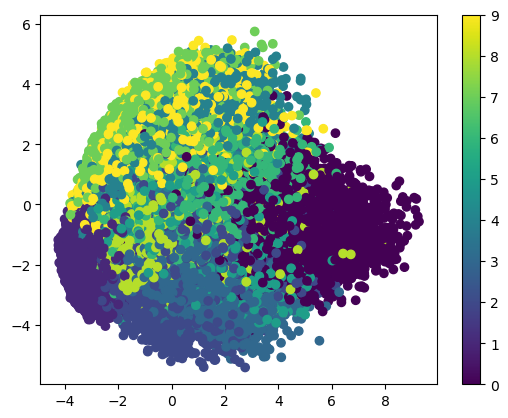

In [2]:
train_images=mnist_x[:60000].to_numpy()
train_labels=mnist_y[:60000].to_numpy()
test_images=mnist_x[60000:].to_numpy()
test_labels=mnist_y[60000:].to_numpy()

train_images =train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images)

plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels)
plt.colorbar()
plt.show()

# T-SNE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [2]:
X = pd.read_csv('mnist_data.csv').to_numpy()
y = pd.read_csv('mnist_target.csv').to_numpy()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


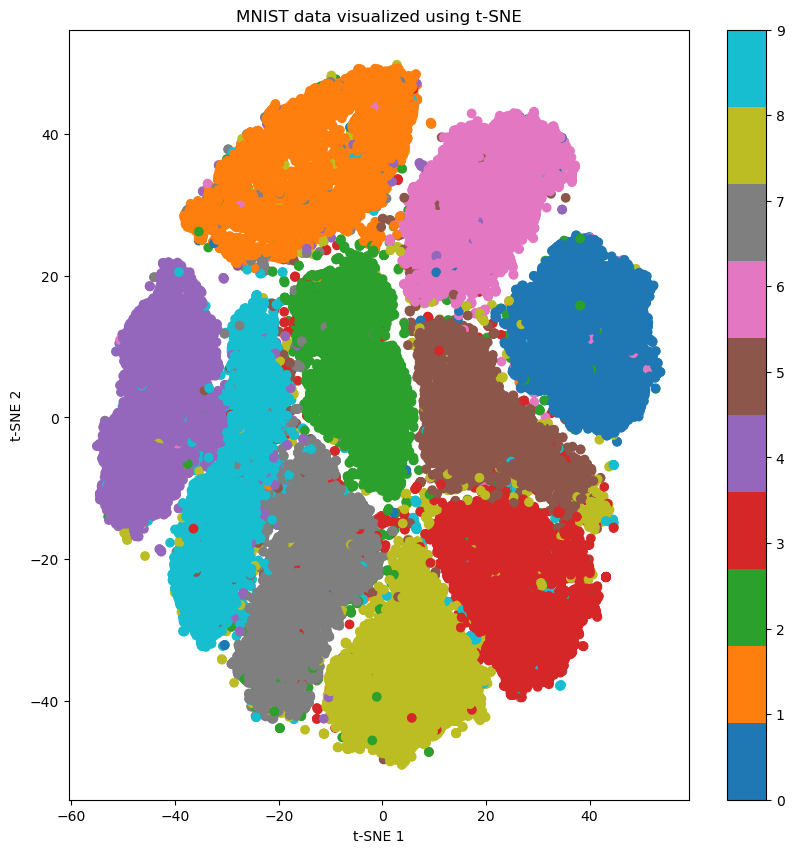

In [3]:
# Apply t-SNE on the data
tsne = TSNE(n_components=2, random_state=42) # Create a TSNE object with 2 dimensions and a fixed random state
X_tsne = tsne.fit_transform(X) # Transform the data to 2 dimensions

# Plot the data with different colors for different digits
plt.figure(figsize=(10, 10)) # Create a figure with a large size
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10') # Scatter plot the points with colors according to the labels
plt.colorbar() # Add a colorbar to show the mapping of colors and digits
plt.xlabel('t-SNE 1') # Add a label for the x-axis
plt.ylabel('t-SNE 2') # Add a label for the y-axis
plt.title('MNIST data visualized using t-SNE') # Add a title for the plot
plt.show() # Show the plot